## 1. Gerekli kütüphanelerin yüklenmesi ve verisetinin hazırlanması

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
# MNIST veri setini yükle
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi normalize et (0-255 aralığından 0-1 aralığına)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veriyi CNN modeline uygun hale getirmek için reshape et
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Etiketleri one-hot encode et
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


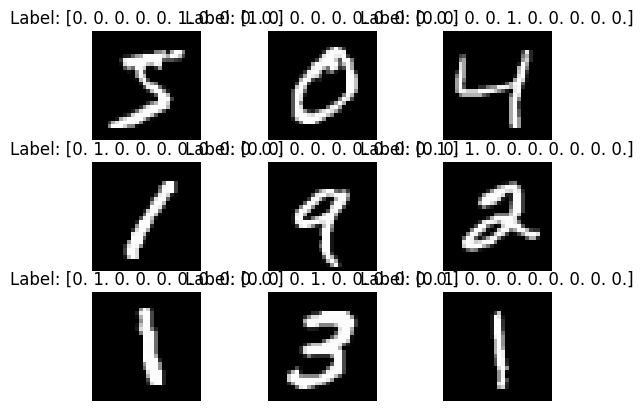

In [13]:
# Eğitim setinden birkaç örnek görüntü göster
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## 2. CNN Modelin Tanımlanması

In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), #ilk Convolutional katmanı
    MaxPooling2D(pool_size=(2, 2)), #ilk MaxPooling katmanı
    Conv2D(64, kernel_size=(3, 3), activation='relu'), #ikinci  Convolutional katmanı
    MaxPooling2D(pool_size=(2, 2)), #ikinci MaxPooling katmanı
    Flatten(), #Veriyi tek boyutlu hale getirme
    Dense(128, activation='relu'), # Tam bağlantılı katman (Dense layer)
    Dense(10, activation='softmax') #Çıkış katmanı (10 sınıf için softmax aktivasyonu)
])


c:\Users\kursa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Modelin özeti
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
#Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 3. Modelin eğitilmesi ve değerlendirilmesi

In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8715 - loss: 0.4545 - val_accuracy: 0.9807 - val_loss: 0.0618
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9828 - val_loss: 0.0505
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9884 - val_loss: 0.0356
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9894 - val_loss: 0.0320
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9940 - loss: 0.0210 - val_accuracy: 0.9883 - val_loss: 0.0388
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9902 - val_loss: 0.0286
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9891 - val_loss: 0.0309
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9960 - loss: 0.0128 - 

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0322
Test set accuracy: 99.16%


## Tanımlanan CNN modelin kaydedilmesi

In [7]:
model.save('mnist_cnn_model.h5')

## 4. Eğitim ve doğrulama kaybı ile doğruluğun görselleştirilmesi

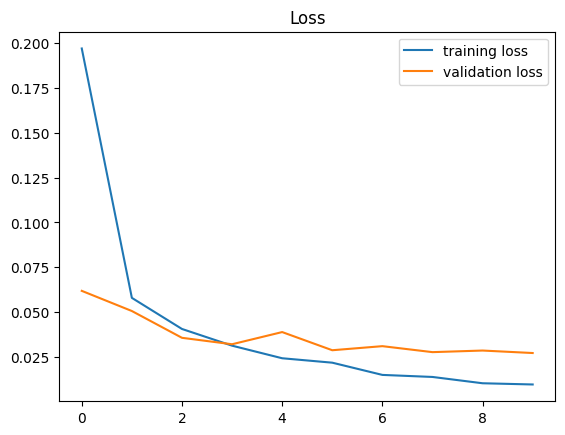

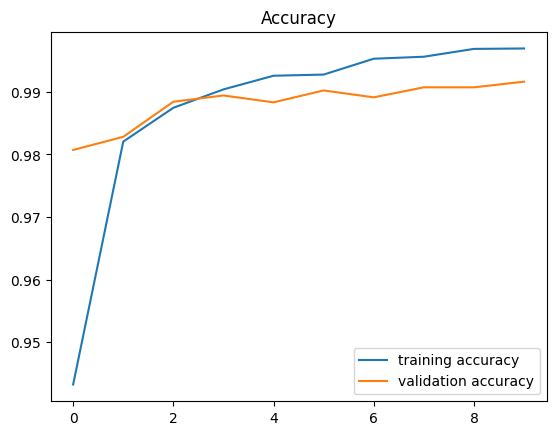

In [8]:
# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu görselleştirme 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix:
#### Modelin hangi sınıflarda doğru ve yanlış tahmin yaptığına bir bakış

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


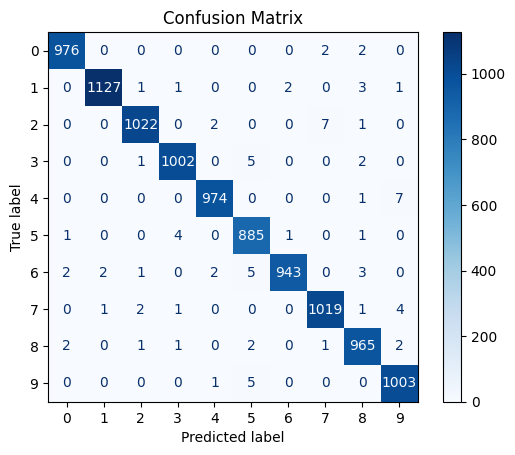

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tahminleri al
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Karışıklık matrisini hesapla ve görselleştir
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Test verisetinden bazı örenklerin görselleştirilmiş halleri

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


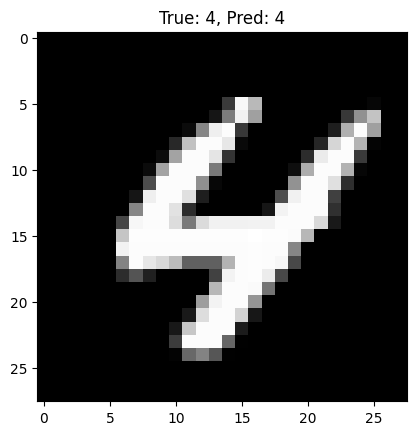

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


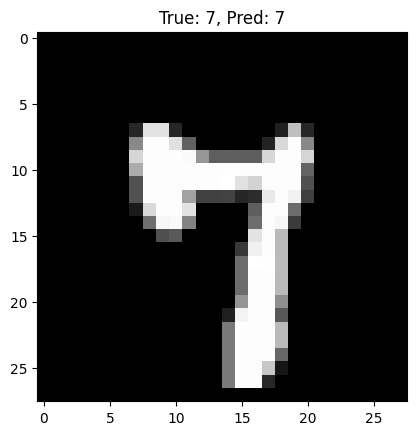

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


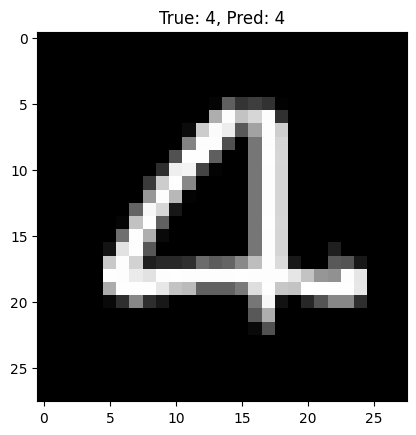

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


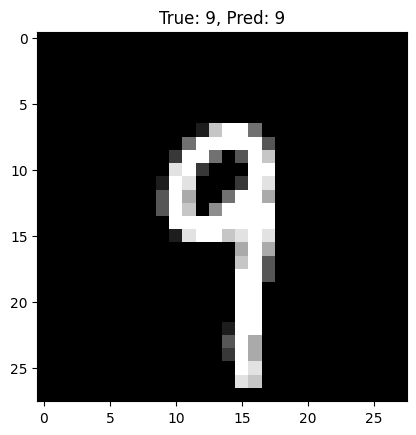

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


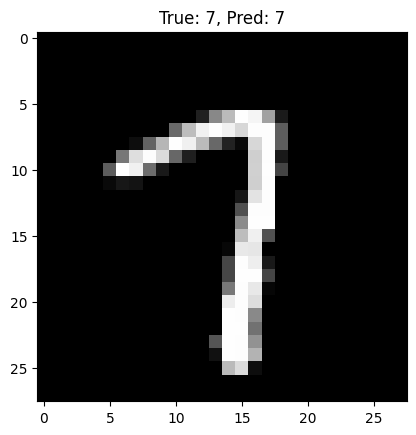

In [10]:
# Test setinden bazı örnekleri görselleştir
num_samples = 5
indices = np.random.choice(np.arange(len(X_test)), num_samples, replace=False)

for i in indices:
    img = X_test[i]
    true_label = np.argmax(y_test[i])
    prediction = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {prediction}")
    plt.show()

## 5. Eğitilen modelin yeni bir görüntü üzerinde test edilmesi.

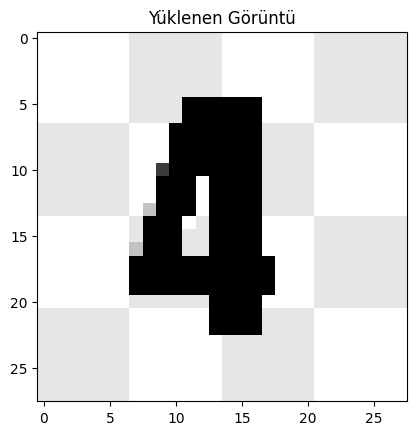

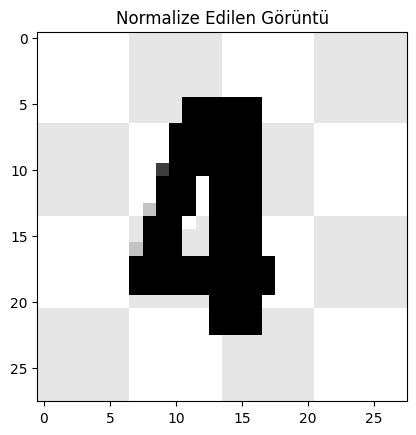

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Tahmin edilen rakam: 4
Tahmin edilen rakam: 4


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Modelin Yüklenmesi
model = load_model('mnist_cnn_model.h5')

def test_et(goruntu_yolu):
    # Görüntüyü yükle
    img = image.load_img(goruntu_yolu, color_mode='grayscale', target_size=(28, 28))

    # Görüntüyü ekrana bastır
    plt.imshow(img, cmap='gray')
    plt.title("Yüklenen Görüntü")
    plt.show()

    # Görüntüyü numpy array'e dönüştür
    img_array = image.img_to_array(img)

    # Görüntüyü normalize et
    img_array = img_array / 255.0

    # Normalize edilen görüntüyü ekrana bastır
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title("Normalize Edilen Görüntü")
    plt.show()

    # Görüntüyü modelde kullanmak için uygun hale getir
    img_array = np.expand_dims(img_array, axis=0)

    # Tahmin etme
    tahmin = model.predict(img_array)

    # Rakamı belirle
    tahmin_edilen_rakam = np.argmax(tahmin)
    print(f"Tahmin edilen rakam: {tahmin_edilen_rakam}")

    return tahmin_edilen_rakam

# Test fonksiyonunun kullanılması
goruntu_yolu = 'dort.png'
sonuc = test_et(goruntu_yolu)
print(f"Tahmin edilen rakam: {sonuc}")